# Example: Spring-Mass-Damper System
Consider the spring-mass-damper system shown where the mass $m = 1$ kg, damping constant $b = 6$ N$\cdot$s/m, and spring constant $k = 25$ N/m.  The system is set in motion by an initial displacement $x(0) = 100$ mm and no initial velocity.

<img src="SpringMassDamperExample.png" width=200>

1. Determine the natural frequency, damping ratio, damped natural frequency and time constant (if appropriate).
2. Is the system overdamped, underdamped, critically damped, or undamped?
3. Complete the provided Jupyter notebook to plot the response.  Does the response show oscillations?  If not, why? 

## Solution

In [1]:
import numpy as np
from IPython.display import display, Math
import matplotlib.pyplot as plt
%matplotlib inline

#### <span style="color:blue">1. Complete the following cell to define the system parameters `m`, `b`, `k`, `x0`, and `v0`</span>

In [2]:
m = 1
b = 6
k = 25
x0 = 0.1
v0 = 0

### Natural Frequency
The natural frequency should be computed in the cell below as 
$$ \omega_n = \sqrt{\frac{k}{m}} $$

#### <span style="color:blue">2. Complete the following cell to define the natural frequency `omega_n`</span>

In [3]:
omega_n = np.sqrt(k/m)
display(Math(r'\omega_n = {} ~rad/s'.format(round(omega_n,3))))

<IPython.core.display.Math object>

### Damping Ratio
The damping ratio should be computed in the cell below as
$$ \zeta = \frac{b}{2\sqrt{mk}} $$

#### <span style="color:blue">3. Complete the following cell to define the damping ratio `zeta`</span>

In [4]:
zeta = b/2/np.sqrt(m*k)
display(Math(r'\zeta = {}'.format(round(zeta,3))))

<IPython.core.display.Math object>

### Damped Natural Frequency
The damped natural frequency should be computed in the cell below as
$$ \omega_d = \omega_n\sqrt{1-\zeta^2} $$

#### <span style="color:blue">4. Complete the following cell to define the damped natural frequency `omega_d`</span>

In [5]:
omega_d = omega_n*np.sqrt(1-zeta**2)
display(Math(r'\omega_d = {} ~rad/s'.format(round(omega_d,3))))

<IPython.core.display.Math object>

### Time Constant
The time constant should be computed in the cell below as
$$ \tau = \frac{1}{\zeta\omega_n} $$

#### <span style="color:blue">5. Complete the following cell to define the time constant `tau`</span>

In [6]:
tau = 1/zeta/omega_n
display(Math(r'\tau = {}'.format(round(tau,3))))

<IPython.core.display.Math object>

### Response Plot
#### <span style="color:blue">6. Complete the following cell to define the time array `t` and response `x` and then run the cell to generate the plot.</span>

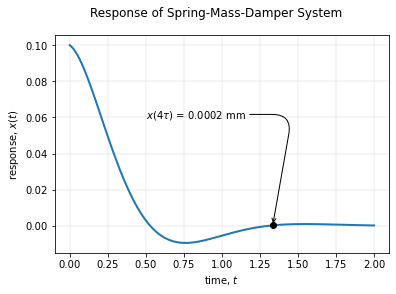

In [8]:
sigma = -zeta*omega_n
t = np.linspace(0,2,2001)
x = np.exp(sigma*t)*(x0*np.cos(omega_d*t) + ((v0-x0*sigma)/omega_n)*np.sin(omega_d*t))
fig = plt.figure()
fig.suptitle('Response of Spring-Mass-Damper System')
ax = fig.add_subplot(111)
ax.set_xlabel('time, $t$')
ax.set_ylabel('response, $x(t)$')
ax.grid(True)
plt.plot(t,x)

# Display the result at t = 4 time constants
t1 = 4*tau
x1 = np.exp(sigma*t1)*(x0*np.cos(omega_d*t1) + ((v0-x0*sigma)/omega_n)*np.sin(omega_d*t1))
plt.plot(t1,x1,'ko')

ax.annotate(r'$x(4\tau)$ = %0.4f mm' % (x1),xy=(t1,x1),xytext=(0.5,0.06),
            arrowprops=dict(arrowstyle="->",connectionstyle="angle,angleA=0,angleB=80,rad=20"))

fig.savefig('SpringMassDamperExample_Response.png',format='png');